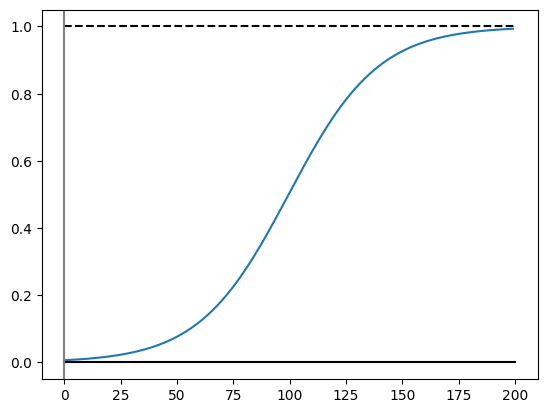

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot(sigmoid(z))
plt.plot([0, 200], [0, 0], 'k-')
plt.plot([0, 200], [1, 1], 'k--')
plt.axvline(x=0, color='grey', linestyle='-') # Corrected from plt.vline()

# Xavier and He Initialization

In [2]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                    distribution='uniform')
dense = tf.keras.layers.Dense(50, activation='sigmoid',
                              kernel_initializer=he_avg_init)

# Nonsaturating Activation Functions

# Leaky Relu

In [4]:
def leaky_relu(z, alpha):
  return np.maximum(alpha * z, z)

z = np.linspace(-5, 5 , 200)

In [5]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer='he_normal')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

# ELU

In [7]:
dense = tf.keras.layers.Dense(50, activation='elu',
                              kernel_initializer='he_normal')

# SELU

ancaq cox deep neural networklerde istifade olunur, amma dense-den basqa hecne layer olmamalidi ve data normalized olmalidi, lecun initializer olmalidi

In [8]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                  kernel_initializer='lecun_normal'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot'
]

In [13]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [14]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.0985 - loss: 2.3121 - val_accuracy: 0.1006 - val_loss: 2.3038
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.0985 - loss: 2.3037 - val_accuracy: 0.1006 - val_loss: 2.3029
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.1006 - val_loss: 2.3028
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027


In [15]:
tf.random.set_seed(42)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu',
                                  kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

# GELU, Swish and Mish

In [18]:
def swish(z, beta):
  return z * sigmoid(beta * z)

def approx_gelu(z):
  return swish(z, beta=1.782)

def softplus(z):
  return np.log(1 + np.exp(z))

def mish(z):
  return z * np.tanh(softplus(z))

# Batch Normalization

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7534 - loss: 0.7166 - val_accuracy: 0.8562 - val_loss: 0.3995
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8552 - loss: 0.4082 - val_accuracy: 0.8710 - val_loss: 0.3647


In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

data activation functions chatmazdan once normalize olmalidi

Batch Normalization Computer Vision ucun cox yaxsidi

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7574 - loss: 0.7169 - val_accuracy: 0.8508 - val_loss: 0.3993
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8572 - loss: 0.4050 - val_accuracy: 0.8656 - val_loss: 0.3696


# Gradient Clipping for RNN

In [26]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)        # 1den balaca olanlara deymir, ondan boyukleri normalize edir  (bir nov learning_rate i azaldir her ikisi)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [27]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)           # butun datani max 1 olmaq sherti ile normalize edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

# Reusing Pretrained Layerd

In [28]:
from types import new_class
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X, y):
  y_for_B = (y == pos_class_id) | (y == neg_class_id)
  y_A = y[~y_for_B]
  y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
  old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
  for old_class_id, new_class_id in zip(old_class_ids, range(8)):
    y_A[y_A == old_class_id] = new_class_id
  return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [29]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5243 - loss: 1.4719 - val_accuracy: 0.8007 - val_loss: 0.6545
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8190 - loss: 0.6043 - val_accuracy: 0.8413 - val_loss: 0.4815
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4693 - val_accuracy: 0.8574 - val_loss: 0.4154
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.4103 - val_accuracy: 0.8696 - val_loss: 0.3787
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8744 - loss: 0.3752 - val_accuracy: 0.8767 - val_loss: 0.3550
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.3514 - val_accuracy: 0.8834 - val_loss: 0.3382
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8868 - loss: 0.3341 - val_accuracy: 0.8864 - val_loss: 0.3258
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 0.3208 - 

In [30]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.4557 - loss: 0.7206 - val_accuracy: 0.4955 - val_loss: 0.7021
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5483 - loss: 0.6877 - val_accuracy: 0.5964 - val_loss: 0.6735
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6419 - loss: 0.6572 - val_accuracy: 0.6855 - val_loss: 0.6456
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7145 - loss: 0.6280 - val_accuracy: 0.7488 - val_loss: 0.6193
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7583 - loss: 0.6013 - val_accuracy: 0.7943 - val_loss: 0.5945
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8169 - loss: 0.5771 - val_accuracy: 0.8299 - val_loss: 0.5715
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8396 - loss: 0.5548 - val_accuracy: 0.8526 - val_loss: 0.5499
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8549 - loss: 0.5338 - val_accuracy: 0.8704 - val_loss: 0.5298

[3.9479546546936035, 0.3935000002384186]

In [31]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])         # output layeri goturme
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))      # onun yerine bunu elave et

In [32]:
tf.random.set_seed(42)

In [33]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())          # A modelinin clonunu gotururuk ki, B_on_A-i yeniden fit etsek, A-nin parametrleri yeniden deyishecek. Ona gore clone yaradiriq ve A modelinin weight-lerini gotururuk


In [34]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [35]:
for layer in model_B_on_A.layers[:-1]:
  layer.traniable = False                                     # bele edirik ki, A modelinin parametrleri deyishmesin

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.5772 - loss: 2.2588 - val_accuracy: 0.7873 - val_loss: 0.5351
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8072 - loss: 0.4868 - val_accuracy: 0.8220 - val_loss: 0.4864
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8315 - loss: 0.4538 - val_accuracy: 0.8457 - val_loss: 0.4489
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8476 - loss: 0.4130 - val_accuracy: 0.8675 - val_loss: 0.4185


In [36]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8896 - loss: 0.3798 - val_accuracy: 0.8793 - val_loss: 0.3939
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8965 - loss: 0.3528 - val_accuracy: 0.8833 - val_loss: 0.3735
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8965 - loss: 0.3304 - val_accuracy: 0.8902 - val_loss: 0.3565
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8992 - loss: 0.3115 - val_accuracy: 0.8961 - val_loss: 0.3420
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9019 - loss: 0.2954 - val_accuracy: 0.8991 - val_loss: 0.3296
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9068 - loss: 0.2813 - val_accuracy: 0.9011 - val_loss: 0.3187
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9041 - loss: 0.2690 - val_accuracy: 0.9011 - val_loss: 0.3092
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9110 - loss: 0.2582 - val_accuracy: 0.9031 - val_loss: 0.3007

In [37]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9035 - loss: 0.2639


[0.2715858519077301, 0.9039999842643738]

In [38]:
(1 - (100 - 93.67) / (100 - 88.33)) * 100

45.75835475578408

In [39]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

In [40]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7570 - loss: 0.7192 - val_accuracy: 0.8560 - val_loss: 0.4000
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8577 - loss: 0.4045 - val_accuracy: 0.8652 - val_loss: 0.3700


# Gradient Clipping for RNN

In [44]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [45]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [46]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5009 - loss: 1.4456 - val_accuracy: 0.7829 - val_loss: 0.6798
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7892 - loss: 0.6349 - val_accuracy: 0.8355 - val_loss: 0.5087
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8407 - loss: 0.4959 - val_accuracy: 0.8634 - val_loss: 0.4345
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.4276 - val_accuracy: 0.8719 - val_loss: 0.3923
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8754 - loss: 0.3865 - val_accuracy: 0.8767 - val_loss: 0.3657
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8821 - loss: 0.3594 - val_accuracy: 0.8782 - val_loss: 0.3474
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8878 - loss: 0.3400 - val_accuracy: 0.8817 - val_loss: 0.3340
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8920 - loss: 0.3252 - 

In [47]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.4301 - loss: 0.9096 - val_accuracy: 0.4847 - val_loss: 0.8011
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4301 - loss: 0.8338 - val_accuracy: 0.4847 - val_loss: 0.7508
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4301 - loss: 0.7782 - val_accuracy: 0.4866 - val_loss: 0.7123
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4301 - loss: 0.7354 - val_accuracy: 0.4946 - val_loss: 0.6816
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4495 - loss: 0.7007 - val_accuracy: 0.5223 - val_loss: 0.6561
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4911 - loss: 0.6722 - val_accuracy: 0.5925 - val_loss: 0.6347
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5501 - loss: 0.6478 - val_accuracy: 0.6716 - val_loss: 0.6161
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6568 - loss: 0.6268 - val_accuracy: 0.7349 - val_loss: 0.5998

[3.8891468048095703, 0.3944999873638153]

In [49]:
tf.random.set_seed(42)

In [50]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [51]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [52]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.4301 - loss: 2.8300 - val_accuracy: 0.4847 - val_loss: 1.4768
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4354 - loss: 1.3024 - val_accuracy: 0.5321 - val_loss: 0.6446
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5740 - loss: 0.6157 - val_accuracy: 0.7250 - val_loss: 0.5453
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7565 - loss: 0.5367 - val_accuracy: 0.7587 - val_loss: 0.5332


In [53]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.7634 - loss: 0.5170 - val_accuracy: 0.7656 - val_loss: 0.5028
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7826 - loss: 0.4819 - val_accuracy: 0.7962 - val_loss: 0.4683
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8288 - loss: 0.4451 - val_accuracy: 0.8249 - val_loss: 0.4395
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8457 - loss: 0.4144 - val_accuracy: 0.8467 - val_loss: 0.4154
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8794 - loss: 0.3889 - val_accuracy: 0.8566 - val_loss: 0.3952
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8939 - loss: 0.3675 - val_accuracy: 0.8675 - val_loss: 0.3779
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8939 - loss: 0.3492 - val_accuracy: 0.8803 - val_loss: 0.3627
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8951 - loss: 0.3331 - val_accuracy: 0.8863 - val_loss: 0.3492

In [54]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9211 - loss: 0.2759


[0.28483718633651733, 0.9100000262260437]

In [55]:
(1 - (100 - 93.67) / (100 - 88.33)) * 100

45.75835475578408

In [56]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=[X_valid, y_valid])

# Momentum optimization

In [57]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [58]:
history = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6681 - loss: 0.9853 - val_accuracy: 0.8132 - val_loss: 0.5131
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8291 - loss: 0.4894 - val_accuracy: 0.8288 - val_loss: 0.4634
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8487 - loss: 0.4361 - val_accuracy: 0.8432 - val_loss: 0.4277
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.4049 - val_accuracy: 0.8524 - val_loss: 0.4053
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.3830 - val_accuracy: 0.8556 - val_loss: 0.3916
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.3654 - val_accuracy: 0.8580 - val_loss: 0.3838
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8747 - loss: 0.3513 - val_accuracy: 0.8578 - val_loss: 0.3790
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8788 - loss: 0.3395 - 

# Nesterov Accelerated Gradient

In [59]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
                                    nesterov = True)

In [60]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6850 - loss: 0.9539 - val_accuracy: 0.8290 - val_loss: 0.4795
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8385 - loss: 0.4699 - val_accuracy: 0.8448 - val_loss: 0.4366
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8529 - loss: 0.4219 - val_accuracy: 0.8504 - val_loss: 0.4152
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8631 - loss: 0.3933 - val_accuracy: 0.8532 - val_loss: 0.3978
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.3726 - val_accuracy: 0.8570 - val_loss: 0.3838
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8769 - loss: 0.3562 - val_accuracy: 0.8592 - val_loss: 0.3754
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3426 - val_accuracy: 0.8624 - val_loss: 0.3682
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8831 - loss: 0.3310 - 

# AdaGrad

In [61]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3)  # her parametr uchun ayri learning_rate yaradir     amma global minimuma chatmir


In [62]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5395 - loss: 1.3706 - val_accuracy: 0.7658 - val_loss: 0.7097
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7690 - loss: 0.6902 - val_accuracy: 0.7976 - val_loss: 0.5983
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8023 - loss: 0.5955 - val_accuracy: 0.8178 - val_loss: 0.5483
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8162 - loss: 0.5487 - val_accuracy: 0.8260 - val_loss: 0.5190
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8244 - loss: 0.5201 - val_accuracy: 0.8312 - val_loss: 0.4994
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8311 - loss: 0.5004 - val_accuracy: 0.8328 - val_loss: 0.4852
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8353 - loss: 0.4857 - val_accuracy: 0.8356 - val_loss: 0.4742
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8389 - loss: 0.4741 - 

# RMSProp

In [63]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)

In [64]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7608 - loss: 0.6657 - val_accuracy: 0.8362 - val_loss: 0.4356
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8547 - loss: 0.4038 - val_accuracy: 0.8546 - val_loss: 0.4080
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8667 - loss: 0.3723 - val_accuracy: 0.8604 - val_loss: 0.4381
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8760 - loss: 0.3550 - val_accuracy: 0.8594 - val_loss: 0.4466
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8776 - loss: 0.3504 - val_accuracy: 0.8504 - val_loss: 0.4551
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8792 - loss: 0.3496 - val_accuracy: 0.8592 - val_loss: 0.4631
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8817 - loss: 0.3454 - val_accuracy: 0.8650 - val_loss: 0.4551
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3425 - 

# Adam Optimization

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,    # momentum
                                     beta_2 = 0.999)  # RMSProp
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7751 - loss: 0.6349 - val_accuracy: 0.8440 - val_loss: 0.3989
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8592 - loss: 0.3849 - val_accuracy: 0.8488 - val_loss: 0.4047
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.3428 - val_accuracy: 0.8612 - val_loss: 0.3737
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8835 - loss: 0.3163 - val_accuracy: 0.8616 - val_loss: 0.3791
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8891 - loss: 0.2979 - val_accuracy: 0.8604 - val_loss: 0.3847
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8949 - loss: 0.2808 - val_accuracy: 0.8652 - val_loss: 0.3751
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8991 - loss: 0.2684 - val_accuracy: 0.8708 - val_loss: 0.3741
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.2557 - 

# Adam Maximization

In [66]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9,
                                       beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7538 - loss: 0.7264 - val_accuracy: 0.8306 - val_loss: 0.4592
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8540 - loss: 0.4182 - val_accuracy: 0.8510 - val_loss: 0.4028
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8674 - loss: 0.3726 - val_accuracy: 0.8628 - val_loss: 0.3817
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3443 - val_accuracy: 0.8654 - val_loss: 0.3626
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8817 - loss: 0.3241 - val_accuracy: 0.8686 - val_loss: 0.3557
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8880 - loss: 0.3079 - val_accuracy: 0.8764 - val_loss: 0.3420
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8916 - loss: 0.2933 - val_accuracy: 0.8770 - val_loss: 0.3378
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2812 - 

# Nadam

# AdamW Optimization

In [67]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=1e-3,
                                      beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)                                # chox deep network ishledirikse AdamW de ishlede bilerik

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7813 - loss: 0.6285 - val_accuracy: 0.8352 - val_loss: 0.4280
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8587 - loss: 0.3890 - val_accuracy: 0.8464 - val_loss: 0.3952
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.3483 - val_accuracy: 0.8592 - val_loss: 0.3664
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8830 - loss: 0.3181 - val_accuracy: 0.8598 - val_loss: 0.3667
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.2966 - val_accuracy: 0.8652 - val_loss: 0.3591
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8940 - loss: 0.2807 - val_accuracy: 0.8626 - val_loss: 0.3688
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8994 - loss: 0.2656 - val_accuracy: 0.8790 - val_loss: 0.3378
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.2527 - 

# Learning rate scheduling

# Power Schedueling

In [68]:
# DEPRECATED:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [69]:
# REOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [70]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6918 - loss: 0.9291 - val_accuracy: 0.8252 - val_loss: 0.4900
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8280 - loss: 0.4918 - val_accuracy: 0.8384 - val_loss: 0.4453
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8460 - loss: 0.4401 - val_accuracy: 0.8450 - val_loss: 0.4245
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8553 - loss: 0.4115 - val_accuracy: 0.8500 - val_loss: 0.4112
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3923 - val_accuracy: 0.8534 - val_loss: 0.3995
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.3776 - val_accuracy: 0.8578 - val_loss: 0.3911
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3658 - val_accuracy: 0.8598 - val_loss: 0.3843
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.3558 - 

# Exponential Schedueling

# Avolding Overfitting Through Regularization

In [71]:
layers = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [72]:
tf.random.set_seed(42)

In [73]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                          activation='relu',
                          kernel_initializer='he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

In [74]:
optimizer= tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7050 - loss: 4.0903 - val_accuracy: 0.8230 - val_loss: 1.8652
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8119 - loss: 1.6270 - val_accuracy: 0.8256 - val_loss: 1.1191


# Dropout

In [75]:
tf.random.set_seed(42)

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda pixellerin 20%-ini atiriq
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda amma neuronlarin 20%-ini
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [77]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2,
                                    momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6838 - loss: 0.8727 - val_accuracy: 0.8338 - val_loss: 0.4527
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8047 - loss: 0.5328 - val_accuracy: 0.8442 - val_loss: 0.4134
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8239 - loss: 0.4819 - val_accuracy: 0.8546 - val_loss: 0.3764
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8327 - loss: 0.4511 - val_accuracy: 0.8544 - val_loss: 0.3752
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8373 - loss: 0.4396 - val_accuracy: 0.8510 - val_loss: 0.3849
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8450 - loss: 0.4245 - val_accuracy: 0.8718 - val_loss: 0.3494
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8475 - loss: 0.4172 - val_accuracy: 0.8720 - val_loss: 0.3495
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8500 - loss: 0.4082 - 

Dropout edenden sonra hem train hem test datasini evaluate etmek lazimdir. Chunki accuracy-e baxanda neuronlarin mueyyen hissesini atir, amma evaluate edende butun neuronlari istifade edir deye overfit edir

In [78]:
model.evaluate(X_train, y_train) , model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8865 - loss: 0.3080
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3642
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3683


([0.3098832964897156, 0.8862727284431458],
 [0.3451817035675049, 0.8740000128746033],
 [0.3705958127975464, 0.8626999855041504])

# MC Dropout

In [79]:
tf.random.set_seed(42)

In [80]:
y_probas = np.stack([model(X_test, training=True)         # training true o demekdi ki predict edende de butun neyronlari goturmesin, dropout elesin                  # np.stack hamisini birleshdirir
                    for sample in range(100)])            # 100 defe o ishi tekrarlayir  (yani 100 defe predict edir)
y_proba = y_probas.mean(axis=0)                     # 100 modelin texmininin ortalamasini qaytarir


In [81]:
model.predict(X_test[:1].round(3))                      # list gozleyir deye [:1] yaziriq

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


array([[1.25830596e-07, 3.07596451e-07, 9.04593307e-08, 2.76025247e-07,
        3.72630566e-08, 7.45562911e-02, 1.04892635e-07, 1.09002575e-01,
        1.23324462e-05, 8.16427827e-01]], dtype=float32)

In [82]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.23 , 0.   , 0.141, 0.   ,
       0.628], dtype=float32)

In [83]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.279, 0.   , 0.153, 0.002,
       0.266], dtype=float32)

In [84]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

np.float64(0.8628)

# Max Norm

In [85]:
dense = tf.keras.layers.Dense(
    100, activation='relu', kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.))                # normallashdiranda birden artiq olsa 1e getirir

MaxNormDense = partial(tf.keras.layers.Dense,                           # funksiyani tekrarlamamaq uchun partial yaziriq
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))


tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7478 - loss: 0.7248 - val_accuracy: 0.8364 - val_loss: 0.4259
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8464 - loss: 0.4231 - val_accuracy: 0.8346 - val_loss: 0.4173
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8575 - loss: 0.3832 - val_accuracy: 0.8364 - val_loss: 0.4100
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8680 - loss: 0.3612 - val_accuracy: 0.8370 - val_loss: 0.4084
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8711 - loss: 0.3472 - val_accuracy: 0.8480 - val_loss: 0.3947
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8751 - loss: 0.3352 - val_accuracy: 0.8504 - val_loss: 0.3913
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8763 - loss: 0.3299 - val_accuracy: 0.8584 - val_loss: 0.3701
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8787 - loss: 0.3242 - 

In [86]:
tf.random.set_seed(42)

In [87]:
y_probas = np.stack([model(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [88]:
model.evaluate(X_train, y_train), model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8690 - loss: 0.3376
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.4022
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8479 - loss: 0.4273


([0.3421091139316559, 0.8675090670585632],
 [0.38586172461509705, 0.8500000238418579],
 [0.4194740355014801, 0.84579998254776])

# Hands - On

In [89]:
tf.keras.backend.clear_session()

In [90]:
tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [91]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert X_train_full.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [92]:
X_train = X_train / 255
X_test = X_test / 255

In [93]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='swish',
                                  kernel_initializer='he_normal'))

In [94]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [95]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('My checkpoints.weights.h5', save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)

In [96]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
  • training=True
  • mask=None

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0